In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "100"
plt.style.use("/afs/ihep.ac.cn/users/f/fuys/.config/matplotlib/Paper.mplstyle")

In [4]:
data_room = pd.read_csv("/dybfs2/nEXO/fuys/lihs/C3neg110-T-112000000.csv",usecols=["Ampl"])*1000 # mv
# data_neg106 = pd.read_csv("/dybfs2/nEXO/fuys/aslc_data/11-12-3Hall-2layer/C3-neg106-T-100000.csv",usecols=["Ampl"])*1000 # mv
# data_neg30 = pd.read_csv("/dybfs2/nEXO/fuys/aslc_data/11-12-3Hall-2layer/C3-neg30-T-100000.csv",usecols=["Ampl"])*1000 # mv

In [ ]:
# data_zero = pd.read_csv("/dybfs2/nEXO/fuys/aslc_data/11-12-3Hall-2layer/C3-zero-T-100000.csv",usecols=["Ampl"])*1000 # mv
# data_neg60 = pd.read_csv("/dybfs2/nEXO/fuys/aslc_data/11-12-3Hall-2layer/C3-neg60-T-100000.csv",usecols=["Ampl"])*1000 # mv
# data_neg90 = pd.read_csv("/dybfs2/nEXO/fuys/aslc_data/11-12-3Hall-2layer/C3-neg90-T-100000.csv",usecols=["Ampl"])*1000 # mv

In [ ]:
# print(data_neg106.head(100))
# print(data_neg106.shape)

In [39]:
package_len = 1000
data_T = 100
print(len(data_room)/(33*package_len))

15.151575757575758


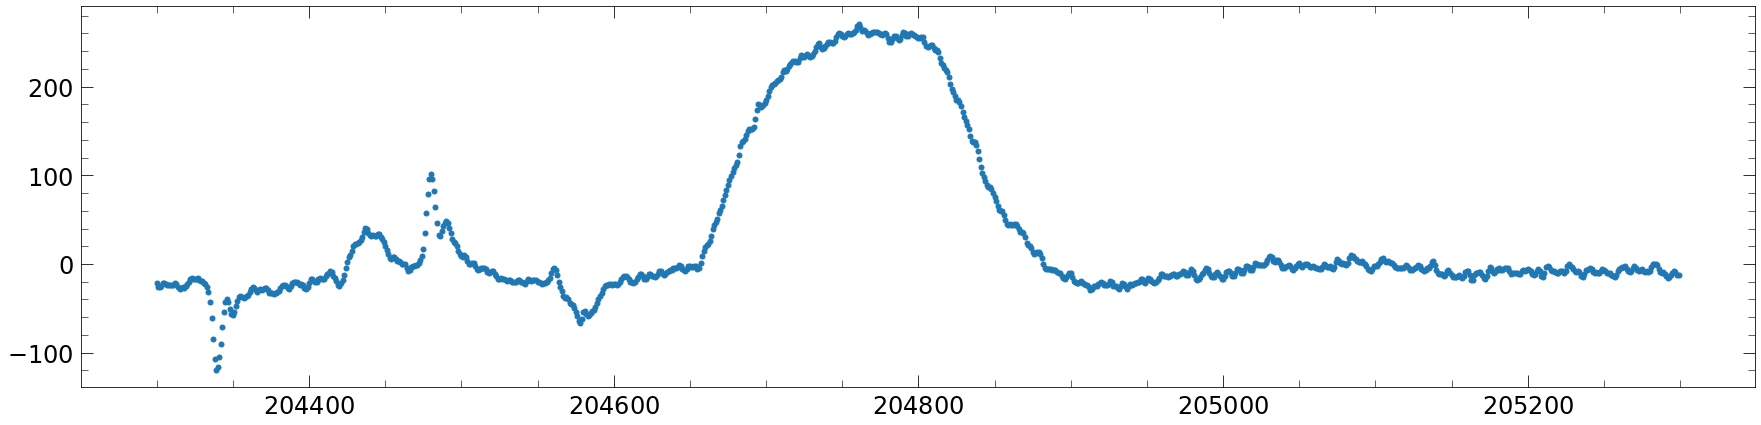

In [58]:
chan_dict={}
for chan in range(33):
    chan_dict[str(chan)] = np.array([])

cut_point = 0#  room T
#cut_point = 32000#  106 T
# cut_point = 16000#  30 T
# cut_point = 16000#  zero T
# cut_point = 17000#  60 T
# cut_point = 32000#  90 T
sam_points = 1000
sel_data = data_room[:]# mv
# sel_data = data_room[cut_point:cut_point+package_len*33*data_T]*1000# mv
#sel_data = data_neg106[cut_point:cut_point+package_len*33*data_T]*1000# mv
# sel_data = data_neg30[cut_point:cut_point+package_len*33*data_T]*1000# mv
# sel_data = data_zero[cut_point:cut_point+package_len*33*data_T]*1000# mv
# sel_data = data_neg60[cut_point:cut_point+package_len*33*data_T]*1000# mv
# sel_data = data_neg90[cut_point:cut_point+package_len*33*data_T]*1000# mv

"""
all_useful_data = np.array([])
for index in range(0, data_T):

    select_data= sel_data[index*package_len*33:(index+1)*package_len*33]
    
    # select_data = select_data[1000:] - select_data[:-1000]
    
    all_useful_data = np.concatenate((all_useful_data, select_data), axis=None)


    for chann in range(32):

        # data = select_data[chann*1000:(chann+1)*1000] 
        #strange         
        data = np.array(select_data[(chann+1)*sam_points:(chann+2)*sam_points])  - np.array(select_data[chann*sam_points:(chann+1)*sam_points])
       
        # result = np.append(data[200:400],data[600:800])
        result = data[700:800]
       
        array_index = chann % 33
        chan_dict[str(array_index)] = np.append(chan_dict[str(array_index)], result)

"""
fig, ax = plt.subplots(figsize=(30, 7))
plt.plot( sel_data[204300:204300+1000],'.')
# plt.plot( sel_data[0:5000],'.')


2.422146689801384
2.1278397839140557
1.9411042426831409
1.8755880741205693
1.7386966496142136
1.8202187682970992
1.816282678962006
1.9550364068814574
2.0097680529990405
2.0781046574690287
1.982742078504592
1.935582449302805
1.9560719393666017
1.9855778340731058
2.4518294651434585
2.1979053821371313
2.1175451197337316
1.7871019812072848
1.901294846351353
1.8912651101365399
1.9889694328555831
1.9515371214650852
1.8839948234655741
2.1037125248328414
1.879723785736458
1.9478805574356477
1.9127905843795376
1.9497496496922595
2.0264610145641515
1.8603668152465755
2.431192129774967
1.8545446332951954
nan


/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


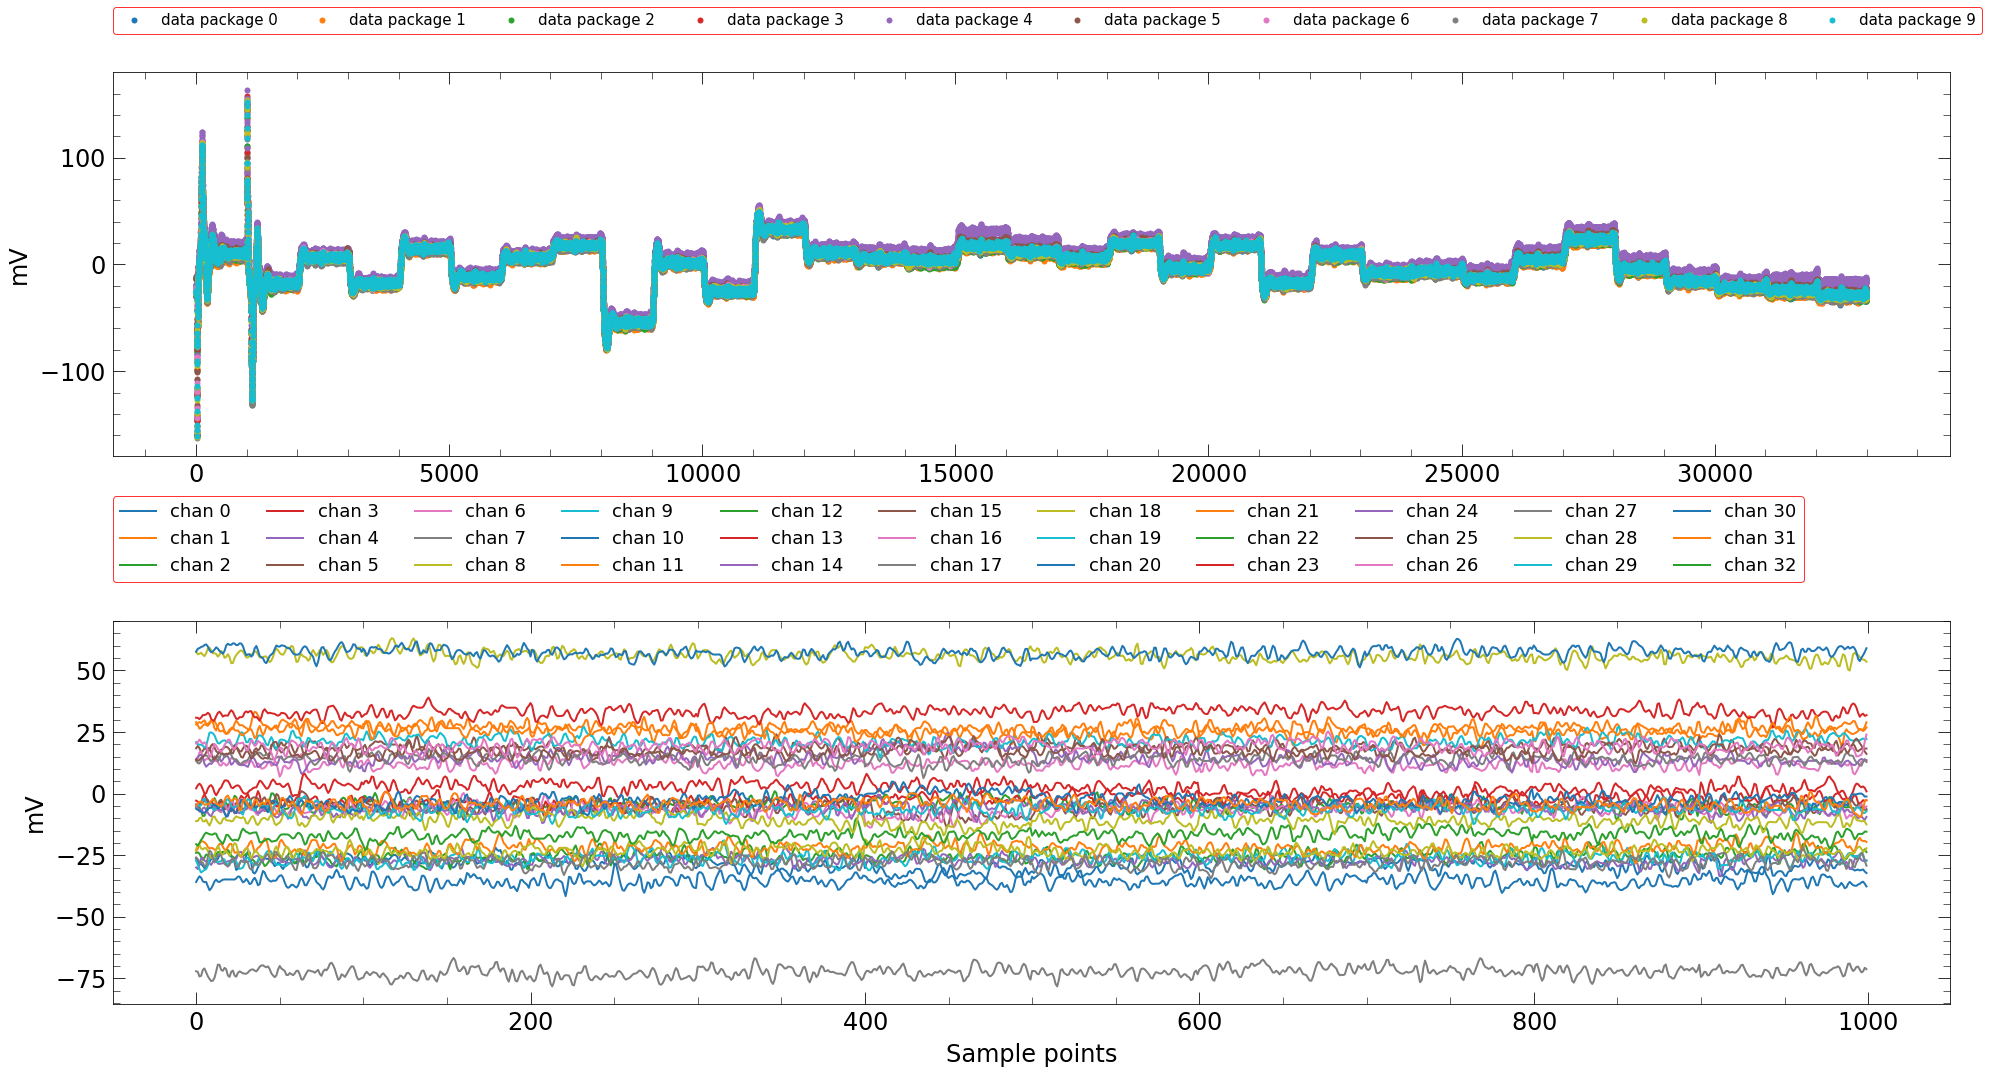

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(30, 15))
dis_chan_range = [0,33]
for n in range(0,10):
    ax[0].plot(all_useful_data[dis_chan_range[0]*1000+33000*n:dis_chan_range[1]*1000+33000*n],\
               '.',label="data package %s"%n)

for index in range(33):
    # if index == 32:
    ax[1].plot(chan_dict[str(index)],label='chan %s'%index)
    print(np.std(chan_dict[str(index)]))

ax[1].set_xlabel("Sample points")
ax[0].set_ylabel("mV")
ax[1].set_ylabel("mV")
# ax.set_ylim(550,675)
ax[0].legend(frameon=True, edgecolor='red',fontsize=15,loc=[0.0,1.1],ncol=11)
ax[1].legend(frameon=True, edgecolor='red',fontsize=18,loc=[0.0,1.1],ncol=11)
plt.tight_layout()
plt.savefig("./plots/waveform_display.pdf")

/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


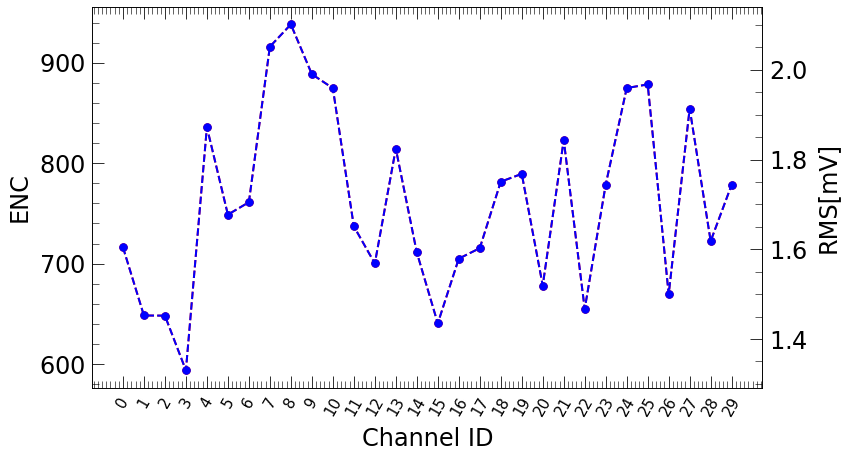

In [ ]:
chan_index=[]
ENC_value=[]
Vstd_value=[]
for index, value in chan_dict.items():
    value = value[0:100]
    # print("std",np.std(value))
    chan_index.append(index)
    ENC_value.append(np.std(value)/14*6250)
    Vstd_value.append(np.std(value))
    # print("Chan: %s V std %0.2f"%(index,np.std(value)))
    # print("ENC",np.std(value)/14*6250)

fig, ax = plt.subplots(figsize=(12, 7))
ax2 = ax.twinx()
ax2.plot(chan_index[2:-1], Vstd_value[2:-1],'.b--',markersize=15)
ax2.set_ylabel("RMS[mV]")

ax.plot(chan_index[2:-1], ENC_value[2:-1],'.r--',markersize=15)
ax.set_xlabel("Channel ID")
ax.set_ylabel("ENC")
ax.set_xticklabels(labels=chan_index,rotation=60,size=15)
plt.savefig("./plots/ENC_results.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


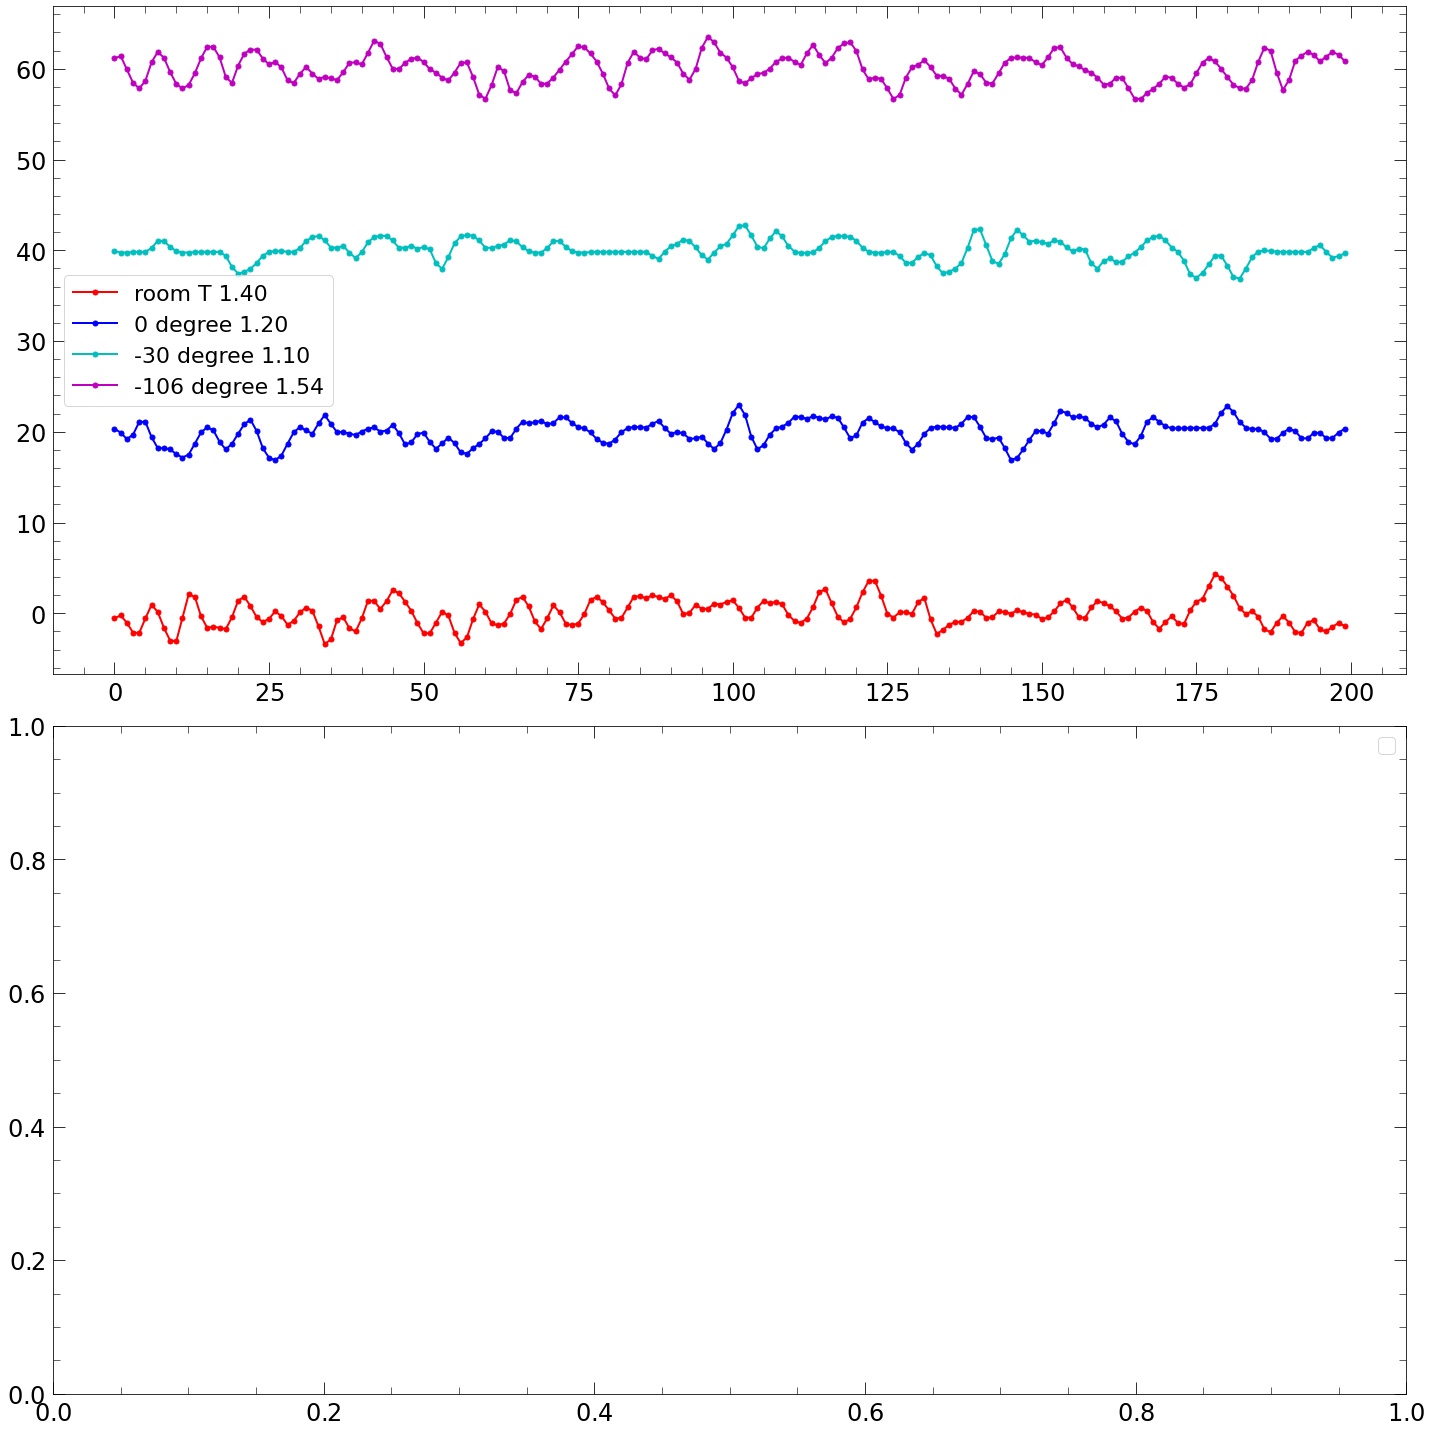

In [ ]:

# cut_point = 16000#  room T
#cut_point = 32000#  106 T
# cut_point = 16000#  30 T
# cut_point = 16000#  zero T
# cut_point = 17000#  60 T
cut_point = 32000#  90 T


display_point = 8600
sam_sel_points = 200
chan_n = 1
sel_data_room = data_room[16000+display_point:16000+display_point+(sam_sel_points*chan_n)]
sel_data_zero = data_zero[16000+display_point:16000+display_point+(sam_sel_points*chan_n)]
sel_data_neg30 = data_neg30[16000+display_point:16000+display_point+(sam_sel_points*chan_n)]
sel_data_neg106 = data_neg106[32000+display_point:32000+display_point+(sam_sel_points*chan_n)]


fig, ax = plt.subplots(nrows=2,figsize=(20, 20))
# ax.plot(sel_data['Time'], sel_data['Ampl'],'.')
offset =20
ax[0].plot(np.arange(len(sel_data_room['Ampl'])),sel_data_room['Ampl'] - np.mean(sel_data_room['Ampl']),'.r-',label="room T %0.2f"%np.std(sel_data_room))
ax[0].plot(np.arange(len(sel_data_room['Ampl'])),sel_data_zero['Ampl']- np.mean(sel_data_zero['Ampl'])+offset,'.b-',label="0 degree %0.2f"%np.std(sel_data_zero))
ax[0].plot(np.arange(len(sel_data_room['Ampl'])),sel_data_neg30['Ampl']- np.mean(sel_data_neg30['Ampl'])+offset*2,'.c-',label="-30 degree %0.2f"%np.std(sel_data_neg30))
ax[0].plot(np.arange(len(sel_data_room['Ampl'])),sel_data_neg106['Ampl']- np.mean(sel_data_neg106['Ampl'])+offset*3,'.m-',label="-106 degree %0.2f"%np.std(sel_data_neg106))

ax[0].legend()
ax[1].legend()
plt.tight_layout()
# ax2.plot(sel_data['Time'],'.r')